### ⚠️ Always run this cell at the beginning ⚠️

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import spec2nexus.spec
import re
from functions import *

# Export from Spec (2024/07/24)

In [2]:
file_path = "2024-07-23_001_Cu-6Sm_Pristine_RT_2024_07_24_1448.spec"
spec_contents = read_esrf_spec_file(file_path)

### Select the scans you want to export

In [3]:
# use the Sample name and the Condition
folder_path = "S1_Cu_6Sm/001_Cu-6Sm_Pristine_RT/"

# list the scan numbers of the files you wan to export (and the corresponding edge type)
scan_number_to_save_list = [80, 81,82,83,84,85]
suffix = "Ce_L3_NEXAFS"

for scan_number_to_save in scan_number_to_save_list:
    if scan_number_to_save in spec_contents:
        save_path = folder_path + f'scan_{scan_number_to_save}'+ f'_{suffix}.dat'
        save_scan_to_ascii(spec_contents[scan_number_to_save], save_path)
        print(f"Scan {scan_number_to_save} saved to {save_path}")
    else:
        print(f"Scan number {scan_number_to_save} not found in the file.")

Scan 80 saved to S1_Cu_6Sm/001_Cu-6Sm_Pristine_RT/scan_80_Ce_L3_NEXAFS.dat
Scan 81 saved to S1_Cu_6Sm/001_Cu-6Sm_Pristine_RT/scan_81_Ce_L3_NEXAFS.dat
Scan 82 saved to S1_Cu_6Sm/001_Cu-6Sm_Pristine_RT/scan_82_Ce_L3_NEXAFS.dat
Scan 83 saved to S1_Cu_6Sm/001_Cu-6Sm_Pristine_RT/scan_83_Ce_L3_NEXAFS.dat
Scan 84 saved to S1_Cu_6Sm/001_Cu-6Sm_Pristine_RT/scan_84_Ce_L3_NEXAFS.dat
Scan 85 saved to S1_Cu_6Sm/001_Cu-6Sm_Pristine_RT/scan_85_Ce_L3_NEXAFS.dat


### Merge all the scans around the same edge and condition

In [10]:
pattern = r'scan_(\d+)_.*\.dat'
files = find_files_with_consecutive_numbers(folder_path, pattern)
full_paths = [os.path.join(folder_path, file) for file in files]

file_dict = group_files_by_start(full_paths)
result_df = process_files(file_dict, "roi1", "mcaLt")

filename_df = f"Data_{suffix}_merged_scans_{scan_number_to_save_list[0]}_{scan_number_to_save_list[-1]}.csv"
result_df.to_csv(folder_path + filename_df, index=False)

### Plot data

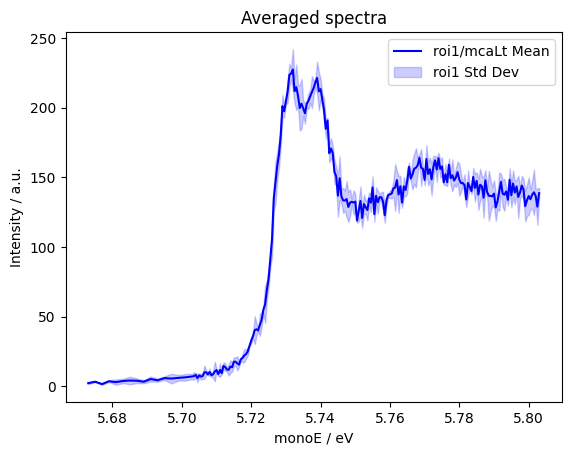

In [11]:
#### This is an example ########################

#change here the file you want to plot
file_to_plot ="S1_Cu_6Sm/001_Cu-6Sm_Pristine_RT/Data_Ce_L3_NEXAFS_merged_scans_80_85.csv"
# and the variables you want to plot
var1="roi1"
var2="mcaLt"

#################################################
result_df = pd.read_csv(file_to_plot)

plt.plot(result_df['monoE'], result_df[f'{var1}/{var2}_mean'], label=f'{var1}/{var2} Mean', color='blue')
plt.fill_between(result_df['monoE'],
                 result_df[f'{var1}/{var2}_mean'] - result_df[f'{var1}/{var2}_std'],
                 result_df[f'{var1}/{var2}_mean'] + result_df[f'{var1}/{var2}_std'],
                 color='blue', alpha=0.2, label='roi1 Std Dev')

plt.xlabel('monoE / eV')
plt.ylabel('Intensity / a.u.')
plt.title('Averaged spectra')
plt.legend()

plt.show()